# Personal Loan Campaign Modelling by Abimbola Salami

# Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

# Objective

1. To predict whether a liability customer will buy a personal loan or not.
2. Which variables are most significant.
3. Which segment of customers should be targeted more.

# Datasets

1. ID: Customer ID
2. Age: Customer’s age in completed years
3. Experience: #years of professional experience
4. Income: Annual income of the customer (in thousand dollars)
5. ZIP Code: Home Address ZIP code.
6. Family: the Family size of the customer
7. CCAvg: Average spending on credit cards per month (in thousand dollars)
8. Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
9. Mortgage: Value of house mortgage if any. (in thousand dollars)
10. Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
11. Securities_Account: Does the customer have securities account with the bank?
12. CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
13. Online: Do customers use internet banking facilities?
14. CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to help with model building
from sklearn.linear_model import LogisticRegression

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve, f1_score
# from sklearn.model_selection import GridSearchCV

# Library to plot charts
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Library to help convert zipcodes
import zipcodes

Loading Data

In [2]:
loanData = pd.read_csv("Loan_Modelling.csv")

loanData.head(10) 

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


# Exploratory Data Analysis

In [3]:
loanData.shape #Getting the number of rows and columns

(5000, 14)

The data contains 5000 rows and 14 columns

In [4]:
loanData.duplicated().sum() # checking for duplicates

0

There are no duplicates

In [5]:
loanData.info() #checking the datatypes and non-null count in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIPCode               5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal_Loan         5000 non-null int64
Securities_Account    5000 non-null int64
CD_Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


All the variables are numerical


In [6]:
loanData.columns #checking the columns in the dataset

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [7]:
loanData.describe().astype(int) #getting a statistical summary of the dataset

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
mean,2500,45,20,73,93169,2,1,1,56,0,0,0,0,0
std,1443,11,11,46,1759,1,1,0,101,0,0,0,0,0
min,1,23,-3,8,90005,1,0,1,0,0,0,0,0,0
25%,1250,35,10,39,91911,1,0,1,0,0,0,0,0,0
50%,2500,45,20,64,93437,2,1,2,0,0,0,0,1,0
75%,3750,55,30,98,94608,3,2,3,101,0,0,0,1,1
max,5000,67,43,224,96651,4,10,3,635,1,1,1,1,1


- Experience contains negative values
- The average age of customers in dataset is 45

# Data Pre-processing

In [8]:
loanData[loanData.Experience < 0].Experience.value_counts() #checking the number of negative entries in Experience

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [9]:
#replacing the negatives with NaN

loanData.Experience.replace(-1, np.nan, inplace=True)
loanData.Experience.replace(-2, np.nan, inplace=True)
loanData.Experience.replace(-3, np.nan, inplace=True)

In [10]:
loanData.dropna(subset=["Experience"], inplace=True) #dropping rows with missing values from "Experience"

In [11]:
loanData = loanData.drop("ID",axis=1) #dropping the "ID" columns as it is not needed

In [12]:
loanData["ZIPCode"] = loanData["ZIPCode"].astype(str) #converting zipcode to string to enable conversion

In [13]:
zipcode = zipcodes.matching("93943") #testing the zipcode library
zipcode

[{'zip_code': '93943',
  'zip_code_type': 'STANDARD',
  'active': True,
  'city': 'Monterey',
  'acceptable_cities': [],
  'unacceptable_cities': [],
  'state': 'CA',
  'county': 'Monterey County',
  'timezone': 'America/Los_Angeles',
  'area_codes': ['831'],
  'world_region': 'NA',
  'country': 'US',
  'lat': '36.5972',
  'long': '-121.8729'}]

In [14]:
#Defining a function to retrun the County for the respective zipcodes and removing "County" from behind

def return_county(x):
    if zipcodes.matching(x) == []:
        return "Null"
    else:
        return zipcodes.matching(x)[0]['county'][:-7]

In [15]:
print (return_county("93943")) #testing the function

Monterey


In [16]:
loanData['County'] = loanData['ZIPCode'].apply(return_county) #Applying the function
loanData.head(10)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County
0,25,1.0,49,91107,4,1.6,1,0,0,1,0,0,0,Los Angeles
1,45,19.0,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles
2,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0,Alameda
3,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0,San Francisco
4,35,8.0,45,91330,4,1.0,2,0,0,0,0,0,1,Los Angeles
5,37,13.0,29,92121,4,0.4,2,155,0,0,0,1,0,San Diego
6,53,27.0,72,91711,2,1.5,2,0,0,0,0,1,0,Los Angeles
7,50,24.0,22,93943,1,0.3,3,0,0,0,0,0,1,Monterey
8,35,10.0,81,90089,3,0.6,2,104,0,0,0,1,0,Los Angeles
9,34,9.0,180,93023,1,8.9,3,0,1,0,0,0,0,Ventura


In [17]:
loanData.info() #checking datatypes and non-null after data treatments

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4948 entries, 0 to 4999
Data columns (total 14 columns):
Age                   4948 non-null int64
Experience            4948 non-null float64
Income                4948 non-null int64
ZIPCode               4948 non-null object
Family                4948 non-null int64
CCAvg                 4948 non-null float64
Education             4948 non-null int64
Mortgage              4948 non-null int64
Personal_Loan         4948 non-null int64
Securities_Account    4948 non-null int64
CD_Account            4948 non-null int64
Online                4948 non-null int64
CreditCard            4948 non-null int64
County                4948 non-null object
dtypes: float64(2), int64(10), object(2)
memory usage: 579.8+ KB


In [18]:
val_county = loanData.County.value_counts() #Checking to see the values in the new column "County"
val_county

Los Angeles        1086
San Diego           565
Santa Clara         560
Alameda             495
Orange              330
San Francisco       255
San Mateo           202
Sacramento          182
Santa Barbara       151
Yolo                129
Monterey            128
Ventura             114
San Bernardino       99
Contra Costa         83
Santa Cruz           67
Riverside            55
Kern                 53
Marin                52
Solano               33
San Luis Obispo      33
Null                 33
Humboldt             32
Sonoma               28
Fresno               26
Placer               24
Butte                19
Shasta               18
El Dorado            17
Stanislaus           15
San Joaquin          13
San Benito           12
Mendocino             8
Siskiyou              7
Tuolumne              7
Trinity               4
Merced                4
Lake                  3
Napa                  3
Imperial              3
Name: County, dtype: int64

In [19]:
# taking a threshold of 50 to view County that occurs more than 50
threshold = 50
val_county[val_county.values >= threshold]

Los Angeles       1086
San Diego          565
Santa Clara        560
Alameda            495
Orange             330
San Francisco      255
San Mateo          202
Sacramento         182
Santa Barbara      151
Yolo               129
Monterey           128
Ventura            114
San Bernardino      99
Contra Costa        83
Santa Cruz          67
Riverside           55
Kern                53
Marin               52
Name: County, dtype: int64

In [20]:
county_list = val_county[val_county.values >= threshold].index.tolist() #converting to a list
print (county_list)

['Los Angeles', 'San Diego', 'Santa Clara', 'Alameda', 'Orange', 'San Francisco', 'San Mateo', 'Sacramento', 'Santa Barbara', 'Yolo', 'Monterey', 'Ventura', 'San Bernardino', 'Contra Costa', 'Santa Cruz', 'Riverside', 'Kern', 'Marin']


In [21]:
#creating a function to replace County with less than 50 occurances as "Others"

def replace_others(x):
    if x not in county_list:
        return "Others"
    else:
        return x

In [22]:
loanData['County'] = loanData['County'].apply(replace_others) #Applying the function
loanData.head(10)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County
0,25,1.0,49,91107,4,1.6,1,0,0,1,0,0,0,Los Angeles
1,45,19.0,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles
2,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0,Alameda
3,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0,San Francisco
4,35,8.0,45,91330,4,1.0,2,0,0,0,0,0,1,Los Angeles
5,37,13.0,29,92121,4,0.4,2,155,0,0,0,1,0,San Diego
6,53,27.0,72,91711,2,1.5,2,0,0,0,0,1,0,Los Angeles
7,50,24.0,22,93943,1,0.3,3,0,0,0,0,0,1,Monterey
8,35,10.0,81,90089,3,0.6,2,104,0,0,0,1,0,Los Angeles
9,34,9.0,180,93023,1,8.9,3,0,1,0,0,0,0,Ventura


In [23]:
loanData = loanData.drop("ZIPCode",axis=1) #dropping the "ZIPCode" columns as it is not needed anymore

# Univariate Analysis

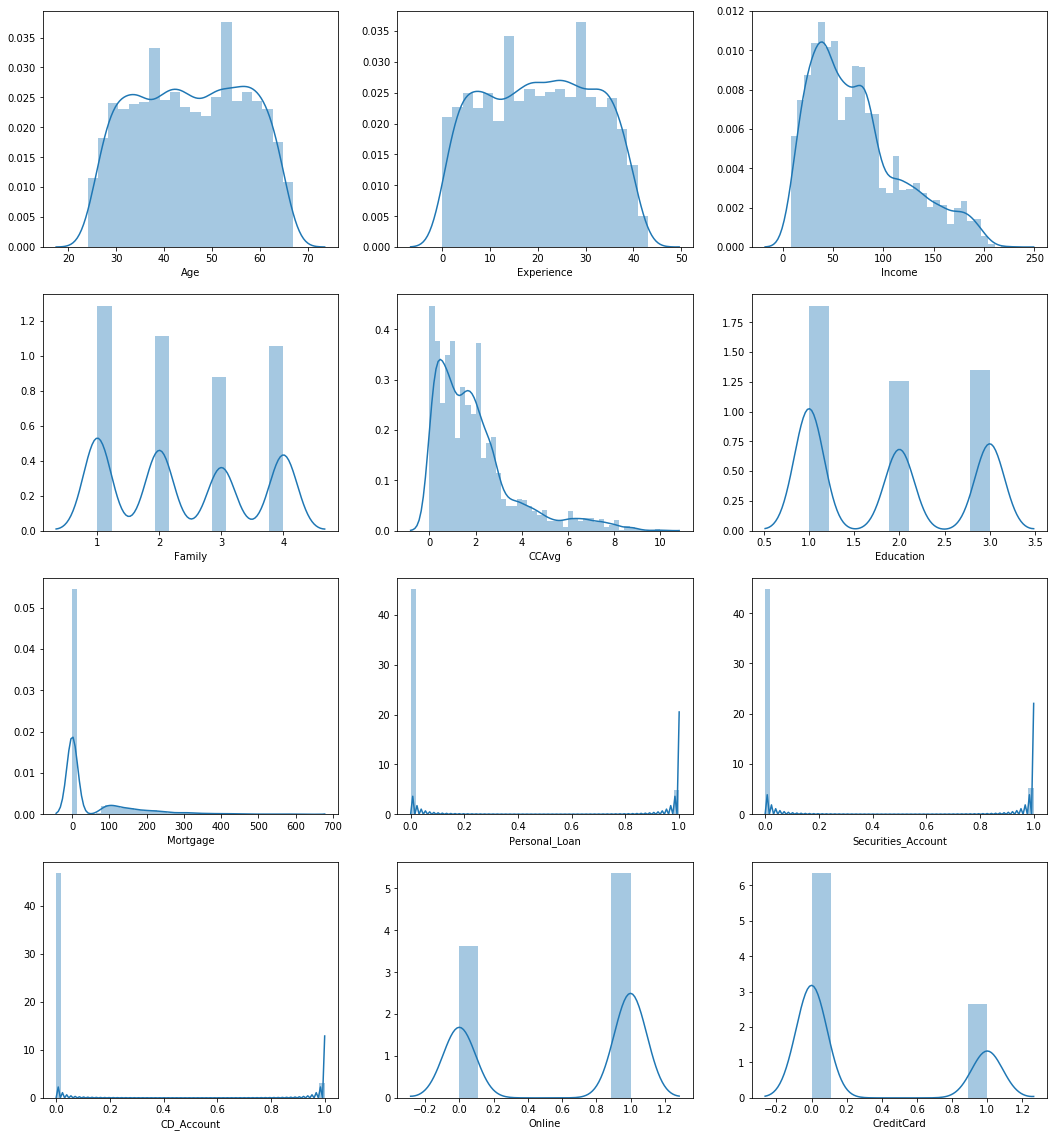

In [24]:
# Plotting univariate analysis on the numeric variables

num_cols = ['Age', 'Experience', 'Income', 'Family', 'CCAvg','Education', 'Mortgage', 
             'Personal_Loan', 'Securities_Account','CD_Account', 'Online', 'CreditCard']

plt.figure(figsize=(18,20))

pos = 1

for i in num_cols:
           
    plt.subplot(4, 3, pos)

    sns.distplot(loanData[i],kde=True)

    pos += 1 

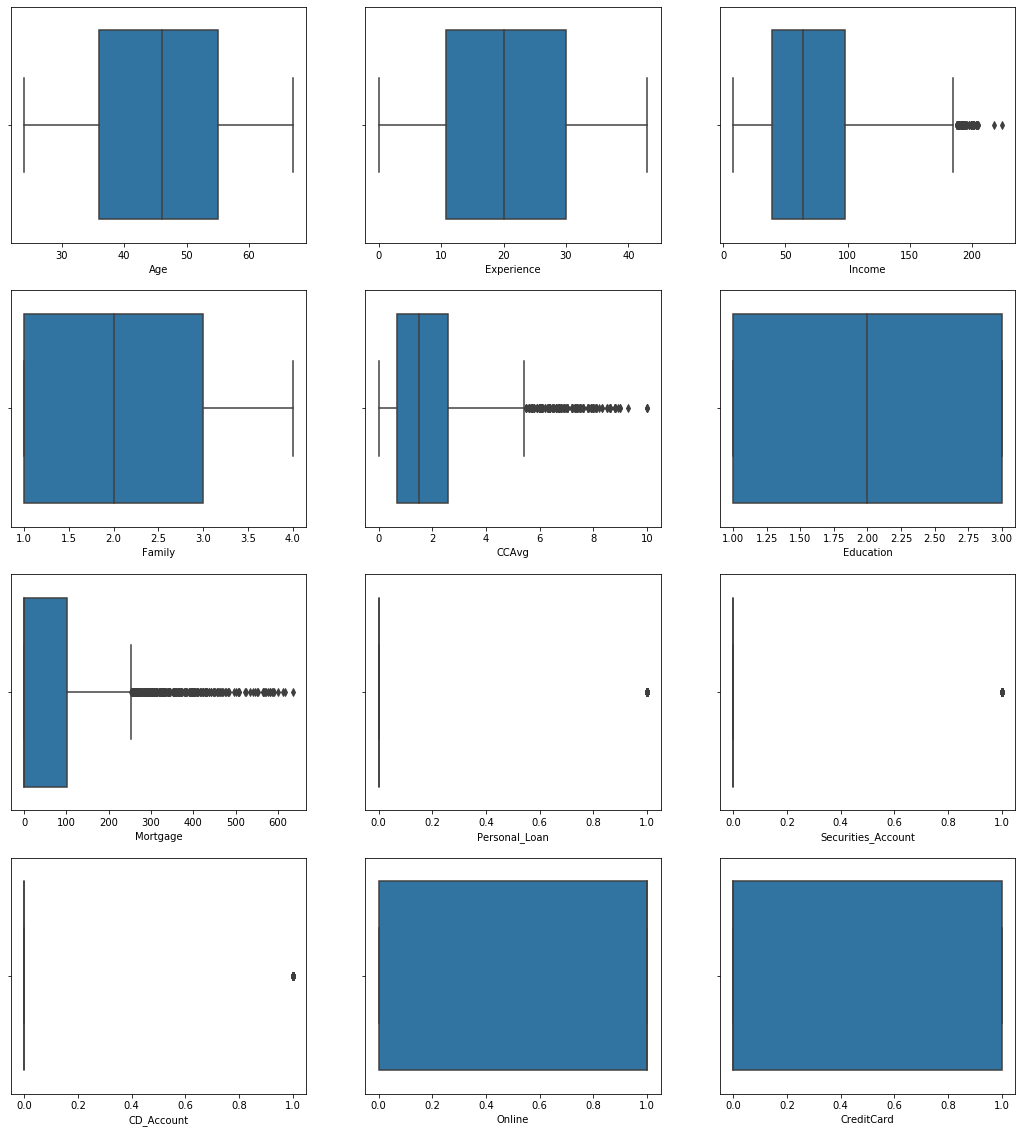

In [25]:
#Checking Outliers using Box plot
plt.figure(figsize=(18,20))

pos = 1

for i in num_cols:
           
    plt.subplot(4, 3, pos)

    sns.boxplot(loanData[i])

    pos += 1 

- Age and Experience are normally distributed
- Income and CCAvg are right skewed

In [26]:
def perc_on_bar(plot, feature):# Function to create barplots that indicate percentage for each category.
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show()  # show the plot

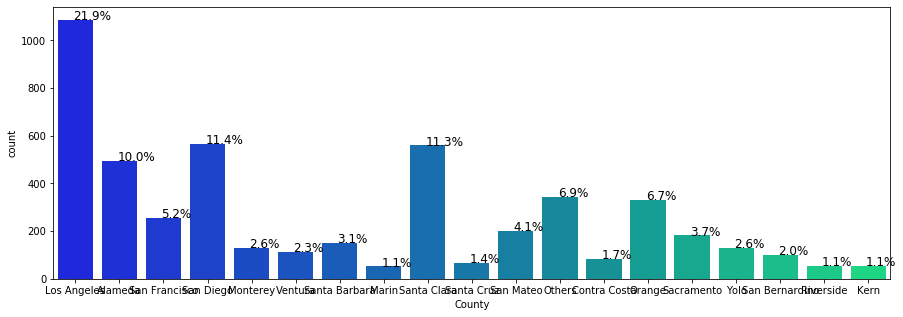

In [27]:
#Plotting univariate analysis on the categorical variable County

plt.figure(figsize=(15, 5))
ax = sns.countplot(loanData["County"], palette="winter")
perc_on_bar(ax, loanData)

Los Angeles has the highest number of customers accounting for 22%

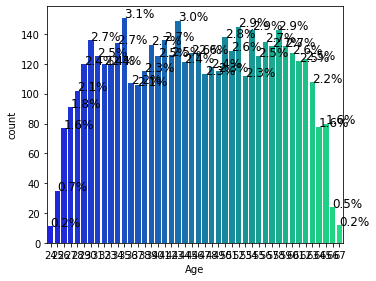

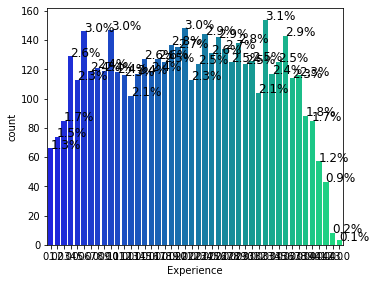

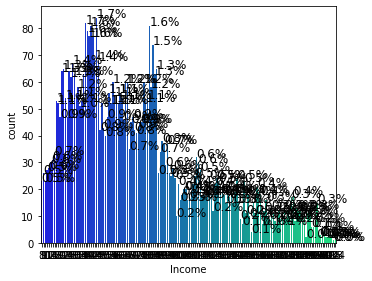

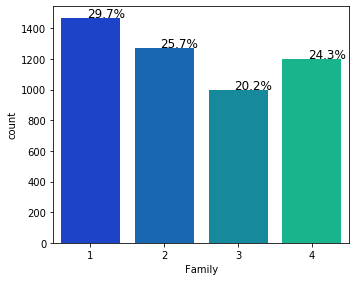

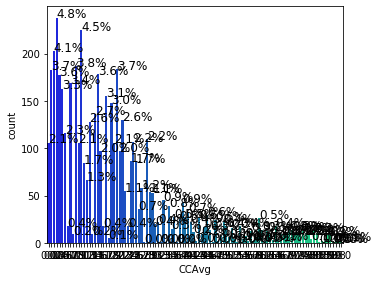

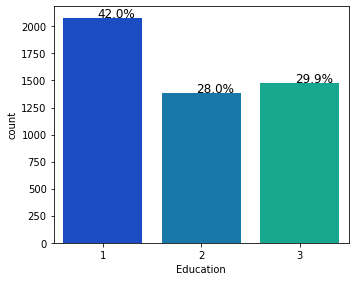

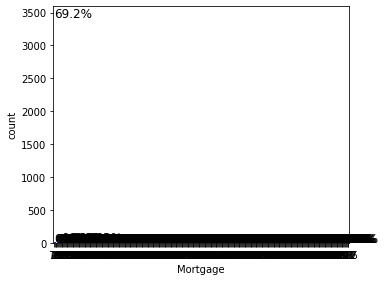

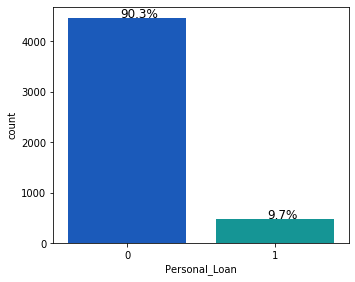

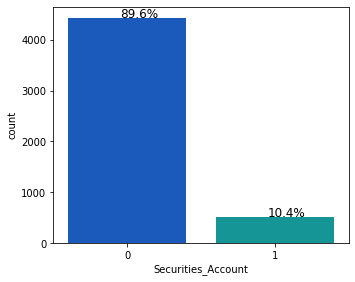

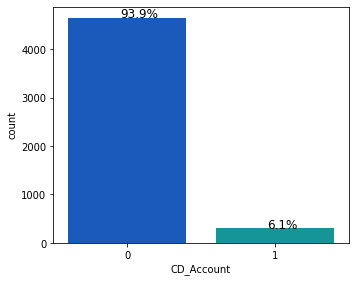

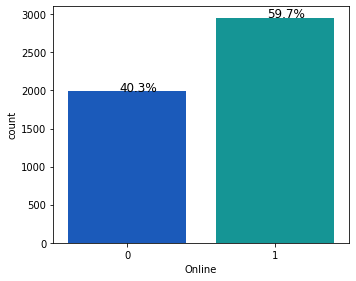

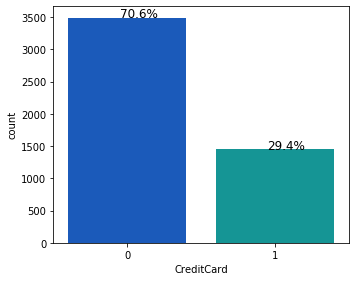

In [28]:
#Plotting univariate analysis on the numerical variables

pos = 1

for i in num_cols:
           
    plt.figure(figsize=(18,20))
    plt.subplot(4, 3, pos)

    ax = sns.countplot(loanData[i], palette="winter")
    
   # ax = sns.countplot(loanData["County"], palette="winter")
    perc_on_bar(ax, loanData)

    pos += 1 

- 29.7% of the customers are of single family size
- 42% of the customers are undergraduate
- 90% of the customers did not accept the personal loan offered in the last campaign
- 89% of the customers do not have security account with the bank
- 93% of the customers do not have a certificate if deposit account with the bank
- 59% of the customers have internet banking facilities
- 29% of the customers use a credit card issued by other Banks

# Bivariate Analysis

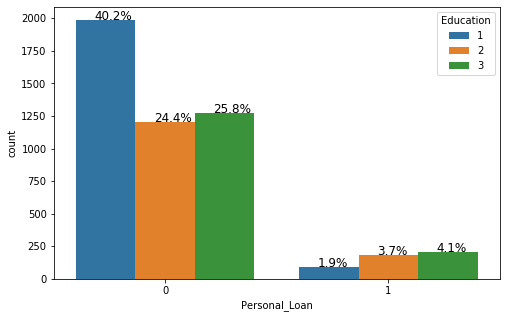

In [29]:
#Plotting the dependent variable "Personal_Loan" against the other variables

plt.figure(figsize=(8, 5))
ax = sns.countplot(loanData["Personal_Loan"], hue=loanData['Education'])
perc_on_bar(ax, loanData)

Most of the customers who accepted the loan in the last campaign are Advanced/ Professional

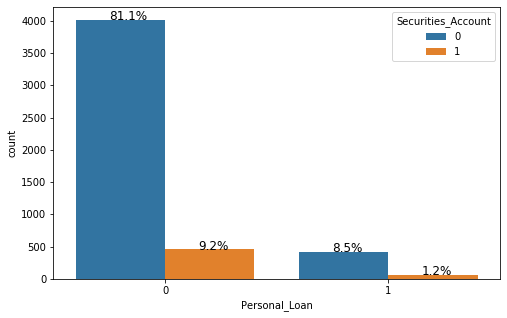

In [30]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(loanData["Personal_Loan"], hue=loanData['Securities_Account'])
perc_on_bar(ax, loanData)

Most of the customers who accepted the loan in the last campaign do not have securities account with the bank

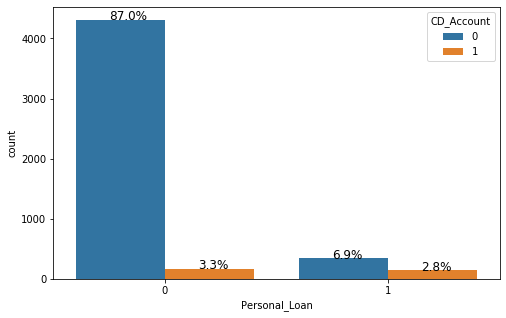

In [31]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(loanData["Personal_Loan"], hue=loanData['CD_Account'])
perc_on_bar(ax, loanData)

Most of the customers who accepted the loan in the last campaign do not have a certificate of deposit account with the bank

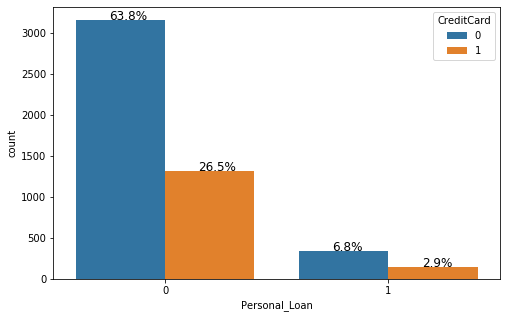

In [32]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(loanData["Personal_Loan"], hue=loanData['CreditCard'])
perc_on_bar(ax, loanData)

Most of the customers who accepted the loan in the last campaign do not use a credit card issued by other Banks

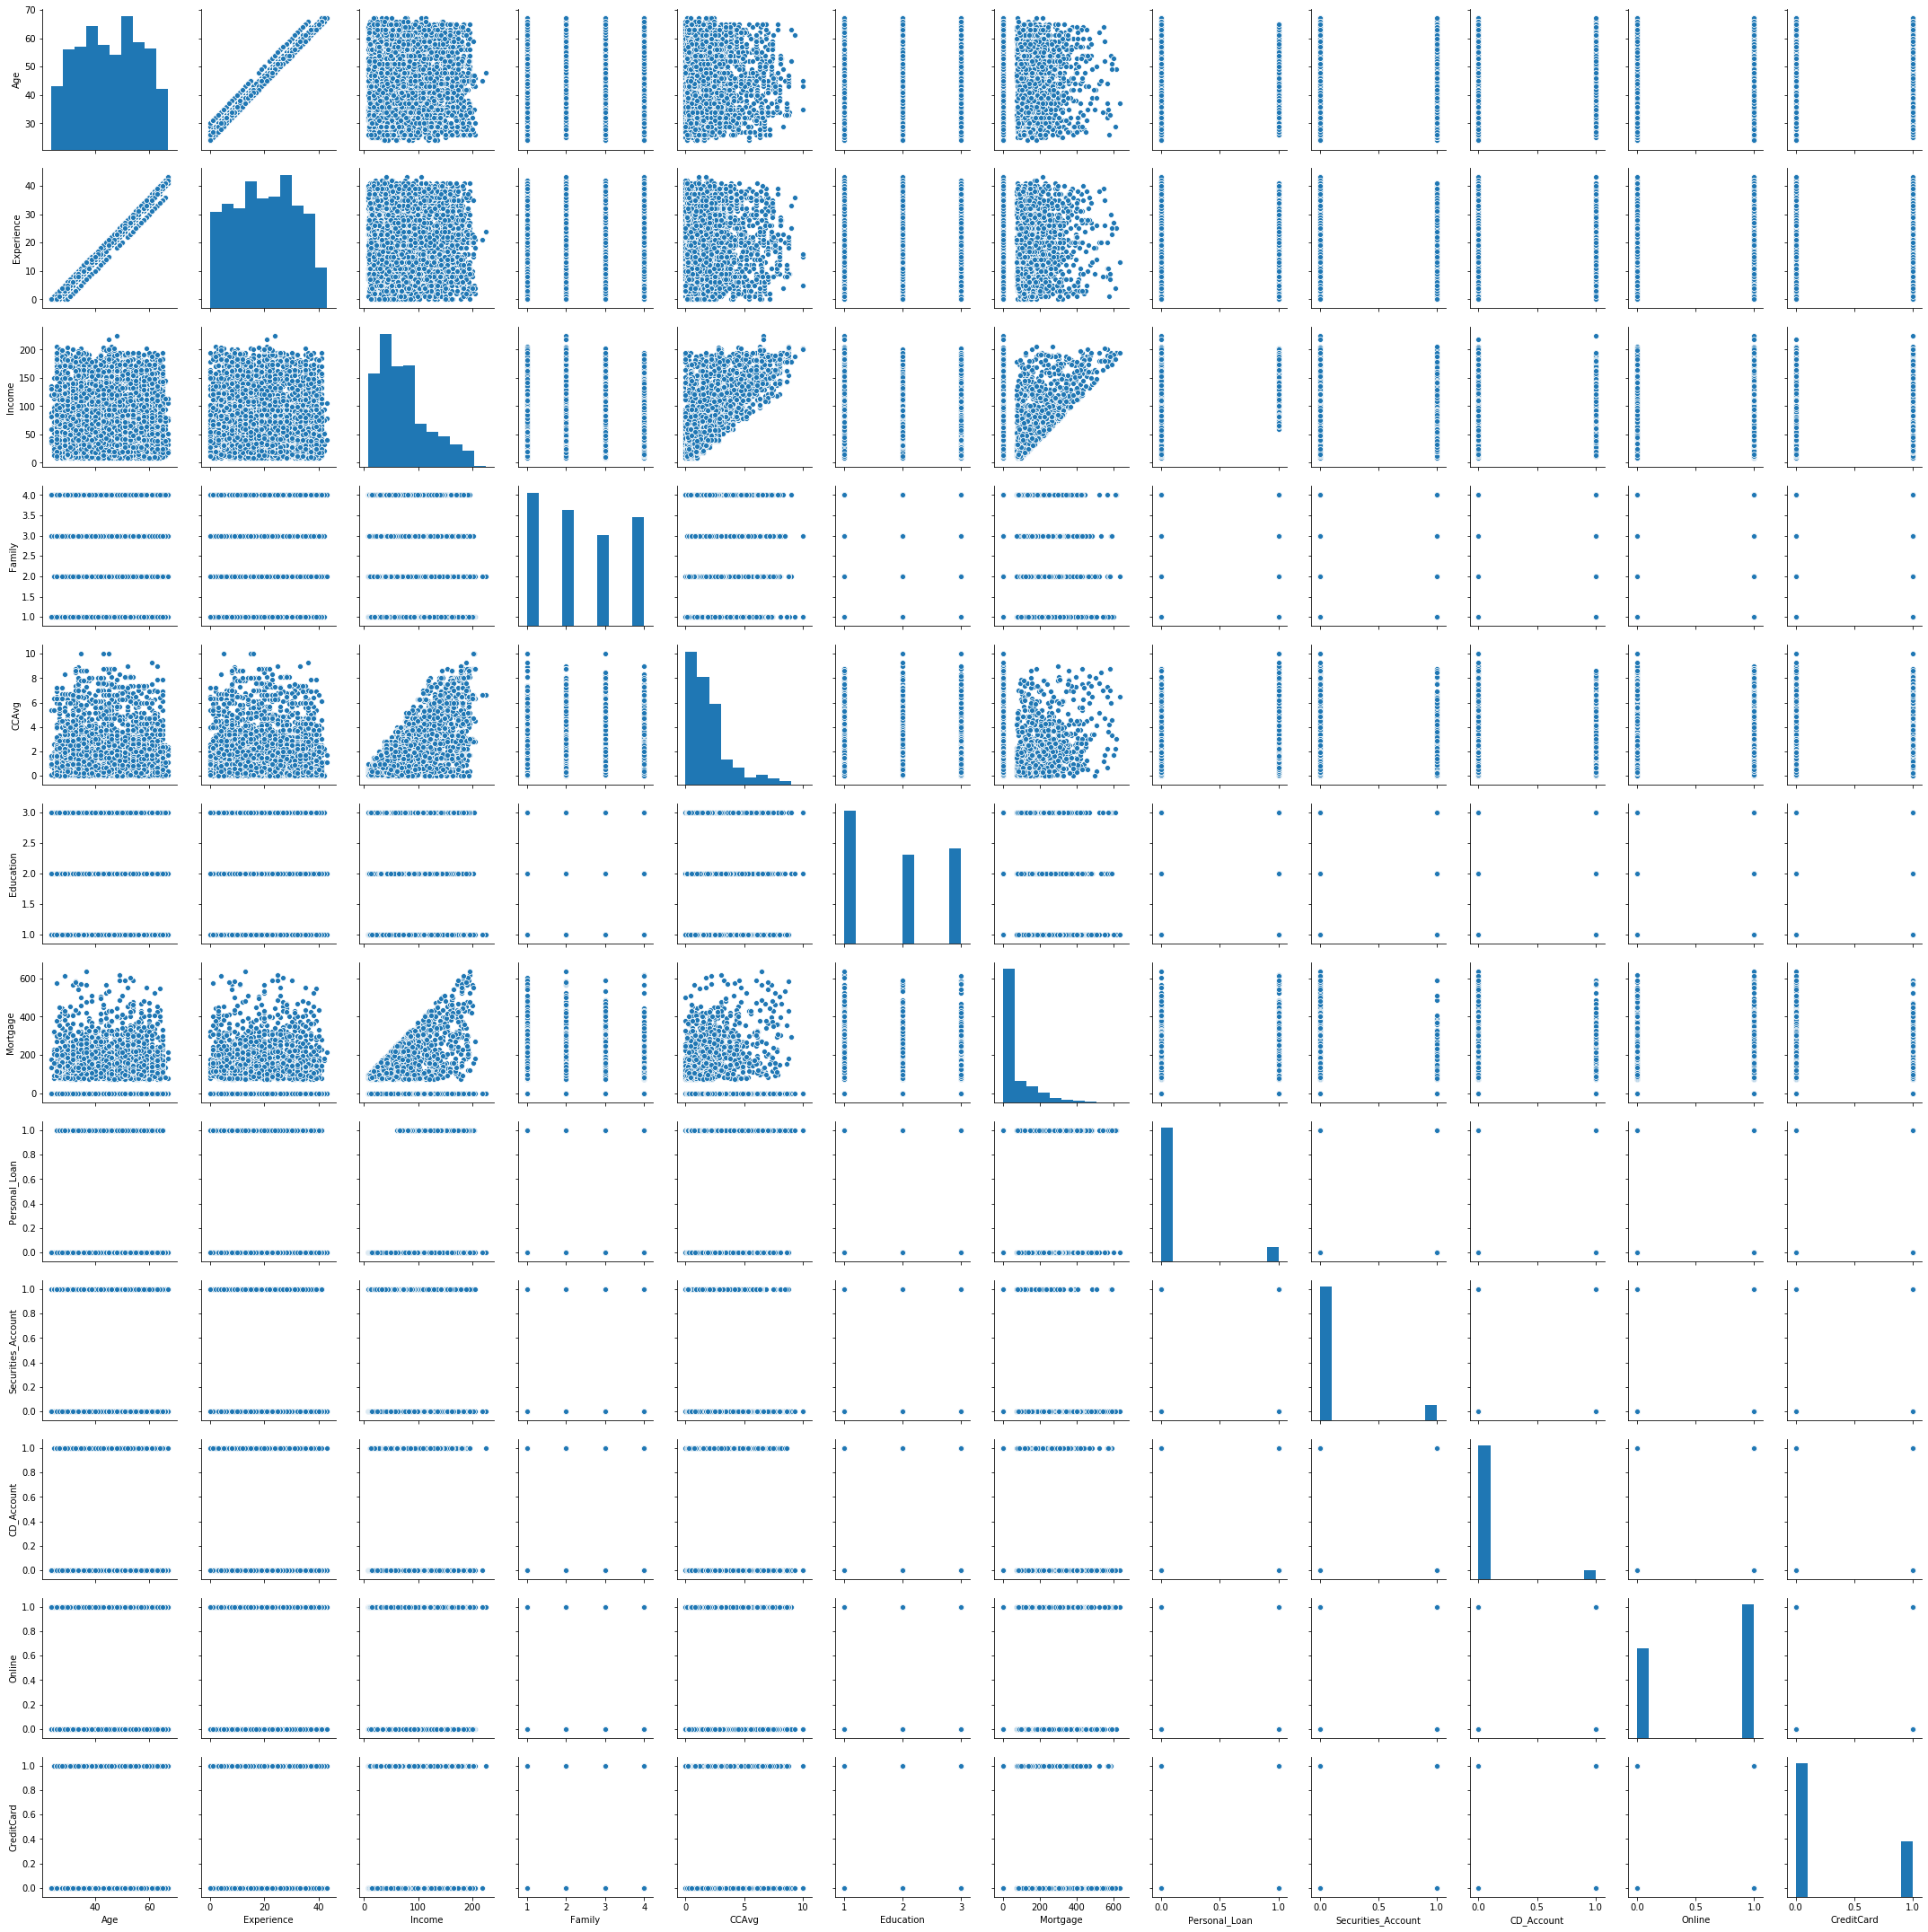

In [33]:
sns.pairplot(loanData); #Checking the relationship between the numerical variables using pairplot

In [34]:
correlation = loanData[num_cols].corr().round(2) #checking the correlation between the numerical variables
correlation

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
Age,1.00,0.99,-0.06,-0.04,-0.05,0.05,-0.02,-0.01,0.00,0.00,0.01,0.01
Experience,0.99,1.00,-0.05,-0.05,-0.05,0.02,-0.01,-0.01,-0.00,0.01,0.01,0.01
Income,-0.06,-0.05,1.00,-0.16,0.65,-0.19,0.21,0.50,-0.00,0.17,0.01,-0.00
Family,-0.04,-0.05,-0.16,1.00,-0.11,0.06,-0.02,0.06,0.02,0.02,0.01,0.01
CCAvg,-0.05,-0.05,0.65,-0.11,1.00,-0.13,0.11,0.37,0.01,0.14,-0.00,-0.01
Education,0.05,0.02,-0.19,0.06,-0.13,1.00,-0.03,0.14,-0.01,0.01,-0.01,-0.01
Mortgage,-0.02,-0.01,0.21,-0.02,0.11,-0.03,1.00,0.14,-0.00,0.09,-0.01,-0.01
Personal_Loan,-0.01,-0.01,0.50,0.06,0.37,0.14,0.14,1.00,0.02,0.32,0.01,0.00
Securities_Account,0.00,-0.00,-0.00,0.02,0.01,-0.01,-0.00,0.02,1.00,0.32,0.02,-0.02
CD_Account,0.00,0.01,0.17,0.02,0.14,0.01,0.09,0.32,0.32,1.00,0.18,0.28


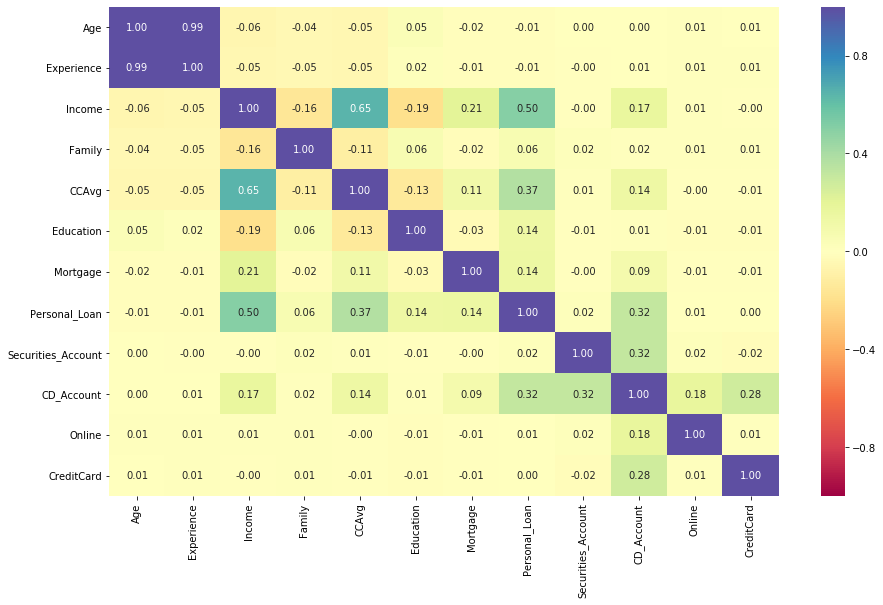

In [35]:
plt.figure(figsize=(15, 9))

sns.heatmap(
    loanData[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

- Age and Experience are highly positively correlated
- Income and CCAvg are slightly positively correlated

In [36]:
val_county = loanData.County.value_counts()
county_list = val_county[val_county.values >= threshold].index.tolist()
print(county_list)

['Los Angeles', 'San Diego', 'Santa Clara', 'Alameda', 'Others', 'Orange', 'San Francisco', 'San Mateo', 'Sacramento', 'Santa Barbara', 'Yolo', 'Monterey', 'Ventura', 'San Bernardino', 'Contra Costa', 'Santa Cruz', 'Riverside', 'Kern', 'Marin']


In [37]:
#Applying one hot encoding for the "County" variables

for i, row in loanData.iterrows():
    txt = loanData.at[i, 'County']
    flag = 0
    for item in county_list:
        if item in txt:
            loanData.loc[i, "County_" + item] = 1
            flag = 1
        else: loanData.loc[i, "County_" + item] = 0
                
loanData.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,...,County_Santa Barbara,County_Yolo,County_Monterey,County_Ventura,County_San Bernardino,County_Contra Costa,County_Santa Cruz,County_Riverside,County_Kern,County_Marin
0,25,1.0,49,4,1.6,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,45,19.0,34,3,1.5,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,39,15.0,11,1,1.0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35,9.0,100,1,2.7,2,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,35,8.0,45,4,1.0,2,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
#Dropping County and ZIPCode columns as they are not relevant in the analysis

loanData = loanData.drop(['County'], axis=1)

In [39]:
#Assigning the dependent variable Personal_Loan
X = loanData.drop(['Personal_Loan'], axis=1)
Y = loanData['Personal_Loan']


#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1)

# Developing the Model

In [40]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=1);

logreg.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [41]:
logreg.coef_ #weights associated with the independent variables

array([[-4.87451049e-01,  4.87717223e-01,  5.05881849e-02,
         6.36674610e-01,  1.21138915e-01,  1.60736248e+00,
         1.09834837e-03,  3.96902565e-01,  2.65486682e+00,
        -6.41501699e-01, -6.87523526e-01, -2.07784028e-02,
        -7.37677574e-04,  4.29685057e-01, -2.39780190e-01,
         7.05764289e-02, -5.00428273e-01,  1.97132961e-01,
        -3.13615452e-01, -9.30006900e-02, -6.40938292e-02,
        -1.05514094e-01,  4.49277850e-02,  1.54521018e-01,
        -3.11503632e-01,  2.79895900e-01, -1.43038716e-01,
         2.13009487e-02,  9.52055895e-02,  1.53015533e-01]])

In [42]:
logreg.intercept_

array([-0.35603167])

In [43]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 1,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [44]:
y_predict = logreg.predict(X_train)

y_predict_prob = logreg.predict_proba(X_train) #getting the probablility values

In [45]:
y_predict

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [46]:
y_predict_prob[:,1]

array([0.001879  , 0.00174189, 0.81156697, ..., 0.00271819, 0.00196692,
       0.0579045 ])

In [47]:
## function to get confusion matrix in a proper format

def draw_cm( actual, predicted):
    cm = confusion_matrix(actual, predicted)
    print(cm)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

In [48]:
confusion_matrix(y_train,y_predict)

array([[3079,   49],
       [ 133,  202]], dtype=int64)

Trainig accuracy 0.947444412359226

Confusion Matrix
[[3079   49]
 [ 133  202]]


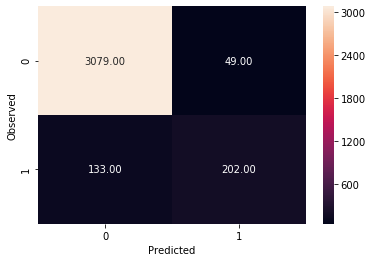

None

Recall: 0.6029850746268657

Precision: 0.8047808764940239

F1 Score: 0.6894197952218429

Log Loss: 1.815217003796658



In [49]:
#Regression Score
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()

print('Confusion Matrix')
print(draw_cm(y_train,y_predict))
print()

print("Recall:",recall_score(y_train,y_predict))
print()

print("Precision:",precision_score(y_train,y_predict))
print()

print("F1 Score:",f1_score(y_train,y_predict))
print()

print("Log Loss:",log_loss(y_train,y_predict))
print()

Testing accuracy 0.9468013468013468

Confusion Matrix
[[1318   22]
 [  57   88]]


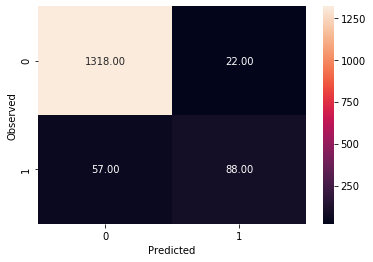

None

Recall: 0.6068965517241379

Precision: 0.8

F1 Score: 0.6901960784313724

Log Loss: 1.8374282332265384



In [50]:
print("Testing accuracy",logreg.score(X_test, y_test))
print()


y_predict = logreg.predict(X_test)

print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()

print("Recall:",recall_score(y_test,y_predict))
print()

print("Precision:",precision_score(y_test,y_predict))
print()

print("F1 Score:",f1_score(y_test,y_predict))
print()

print("Log Loss:",log_loss(y_test,y_predict))
print()

In [51]:
print("Roc Auc Score:",roc_auc_score(y_train,logreg.predict(X_train)))

Roc Auc Score: 0.7936600564950186


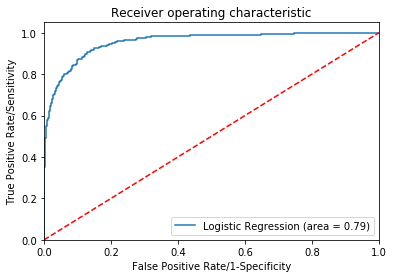

In [52]:
#AUC ROC curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


logit_roc_auc = roc_auc_score(y_train, logreg.predict(X_train))

fpr, tpr, thresholds = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])

plt.figure()

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate/1-Specificity')
plt.ylabel('True Positive Rate/Sensitivity')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

,fpr,tpr,1-fpr,tf,thresholds
0,0.00000,0.000000,1.00000,-1.000000,1.998823
1,0.00000,0.002985,1.00000,-0.997015,0.998823
2,0.00000,0.310448,1.00000,-0.689552,0.884237
3,0.00032,0.310448,0.99968,-0.689233,0.881361
4,0.00032,0.343284,0.99968,-0.656397,0.867378


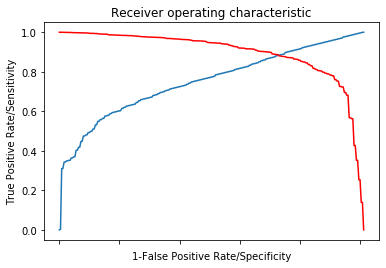

In [53]:
import pylab as pl

i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

# Plot tpr vs 1-fpr
fig, ax = pl.subplots()
pl.plot(roc['tpr'])
pl.plot(roc['1-fpr'], color = 'red')
pl.xlabel('1-False Positive Rate/Specificity')
pl.ylabel('True Positive Rate/Sensitivity')
pl.title('Receiver operating characteristic')
ax.set_xticklabels([])

display(roc.head())

In [54]:
clf = LogisticRegression(random_state=1)

clf.fit(X_train, y_train)

THRESHOLD = 0.5

preds = np.where(clf.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.946801
recall,0.606897
precision,0.800000
roc_auc_score,0.795239


In [55]:
clf = LogisticRegression(random_state=1)

clf.fit(X_train, y_train)

THRESHOLD = 0.3

preds = np.where(clf.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.940067
recall,0.703448
precision,0.689189
roc_auc_score,0.834560


In [56]:
clf = LogisticRegression(random_state=1)

clf.fit(X_test, y_test)

THRESHOLD = 0.3

preds = np.where(clf.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.946128
recall,0.765517
precision,0.707006
roc_auc_score,0.865594


In [57]:
train_score=[]
test_score=[]
solver_info=[]
class_info=[]
C_info=[]

solver = ['newton-cg','lbfgs', 'liblinear', 'sag', 'saga']
class_weight=[None,'balanced']
C = [0.75,1] #[0.1, 0.2, 0.3, 0.4, 0.5...]


for i in solver:
    for j in C:
        for k in class_weight:
            
            model = LogisticRegression(random_state=1, class_weight=k, C = j,solver=i)  # changing values of solver

            model.fit(X_train, y_train)
            y_predict_train=model.predict(X_train)
            y_predict_test = model.predict(X_test) 

            train_score.append(round(f1_score(y_predict_train, y_train),3))
            test_score.append(round(f1_score(y_predict_test, y_test),3))

            solver_info.append(i)
            C_info.append(j)
            class_info.append(k)

In [58]:
i = np.arange(len(train_score))
resultDF = pd.DataFrame({'Solver': pd.Series(solver_info,index=i),'C Value' : pd.Series(C_info, index=i),\
                    'Class Weight' : pd.Series(class_info, index = i),'train_scores' : pd.Series(train_score, index = i),
                   'test_scores' : pd.Series(test_score, index = i)})

In [59]:
resultDF

,Solver,C Value,Class Weight,train_scores,test_scores
0,newton-cg,0.75,None,0.718,0.718
1,newton-cg,0.75,balanced,0.626,0.624
2,newton-cg,1.00,None,0.720,0.728
3,newton-cg,1.00,balanced,0.626,0.623
4,lbfgs,0.75,None,0.697,0.710
5,lbfgs,0.75,balanced,0.602,0.632
6,lbfgs,1.00,None,0.689,0.690
7,lbfgs,1.00,balanced,0.601,0.631
8,liblinear,0.75,None,0.708,0.719
9,liblinear,0.75,balanced,0.619,0.631


In [60]:
resultDF[resultDF['test_scores']==resultDF['test_scores'].max()]

,Solver,C Value,Class Weight,train_scores,test_scores
2,newton-cg,1.0,None,0.72,0.728


In [61]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [62]:
# Defining X and Y variables
X = loanData.drop(['Personal_Loan'], axis=1)
Y = loanData['Personal_Loan']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30,random_state=1)

In [63]:
model = LogisticRegression(solver='newton-cg',n_jobs=-1,random_state=1,max_iter=20)

In [64]:
#Building the model first with all variables
sfs = SFS(model, k_features=10, forward=True, floating=False, scoring='f1', verbose=2, cv=3,n_jobs=-1)

sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.3s finished

[2021-06-19 02:14:24] Features: 1/10 -- score: 0.4191477931205983[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    4.7s finished

[2021-06-19 02:14:29] Features: 2/10 -- score: 0.5039177281740211[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    4.4s finished

[2021-06-19 02:14:33] Features: 3/10 -- score: 0.583015873015873[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    3.3s finished

[2021-06-19 02:14:37] Features: 4/10 -- score: 0.611610800744879[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    2.9s finished

[2

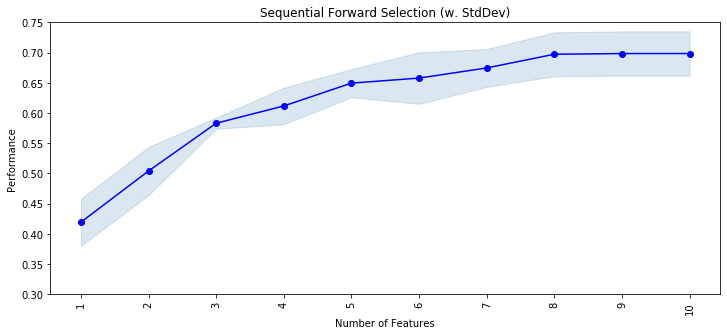

In [65]:
fig1 = plot_sfs(sfs.get_metric_dict(),kind='std_dev',figsize=(12,5))
plt.ylim([0.3, 0.75])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.xticks(rotation=90)
plt.show()

In [66]:
feat_cols = list(sfs.k_feature_idx_)

In [67]:
feat_cols

[0, 1, 2, 3, 4, 5, 8, 10, 21, 26]

In [68]:
x_train_final = X_train[X_train.columns[feat_cols]]

# Creating new x_test with the same variables selected for x_train
x_test_final = X_test[x_train_final.columns]

# Fitting linear model
log_reg_final_model = LogisticRegression(solver='lbfgs',n_jobs=-1,random_state=1,max_iter=20)
log_reg_final_model.fit(x_train_final, y_train)

LogisticRegression(max_iter=20, n_jobs=-1, random_state=1)

In [69]:
coef_df = pd.DataFrame(
    np.append(log_reg_final_model.coef_.flatten(), log_reg_final_model.intercept_),
    index=x_train_final.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df.sort_values(by="Coefficients",ascending=False)

,Coefficients
Education,0.244477
Experience,0.210390
Family,0.198817
CCAvg,0.085137
CD_Account,0.072021
Income,0.031618
County_Yolo,-0.001807
County_Santa Cruz,-0.002120
CreditCard,-0.016780
Intercept,-0.024128


# Decision Tree

In [70]:
X = loanData.drop("Personal_Loan" , axis=1)
y = loanData.pop("Personal_Loan")

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [72]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [73]:
print("Accuracy on training set : ",dTree.score(X_train, y_train))
print("Accuracy on test set : ",dTree.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.9764309764309764


In [74]:
#Checking number of positives
y.sum(axis = 0)

480

In [75]:
#Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [76]:
#Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

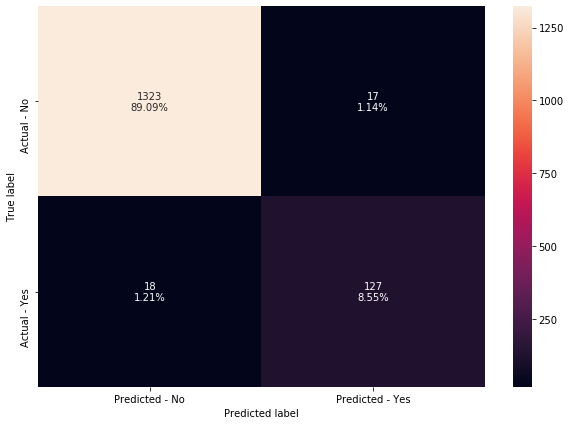

In [77]:
make_confusion_matrix(dTree,y_test)

In [78]:
#Recall on train and test
get_recall_score(dTree)

Recall on training set :  1.0
Recall on test set :  0.8758620689655172


In [79]:
feature_names = list(X.columns)
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'County_Los Angeles', 'County_San Diego', 'County_Santa Clara', 'County_Alameda', 'County_Others', 'County_Orange', 'County_San Francisco', 'County_San Mateo', 'County_Sacramento', 'County_Santa Barbara', 'County_Yolo', 'County_Monterey', 'County_Ventura', 'County_San Bernardino', 'County_Contra Costa', 'County_Santa Cruz', 'County_Riverside', 'County_Kern', 'County_Marin']


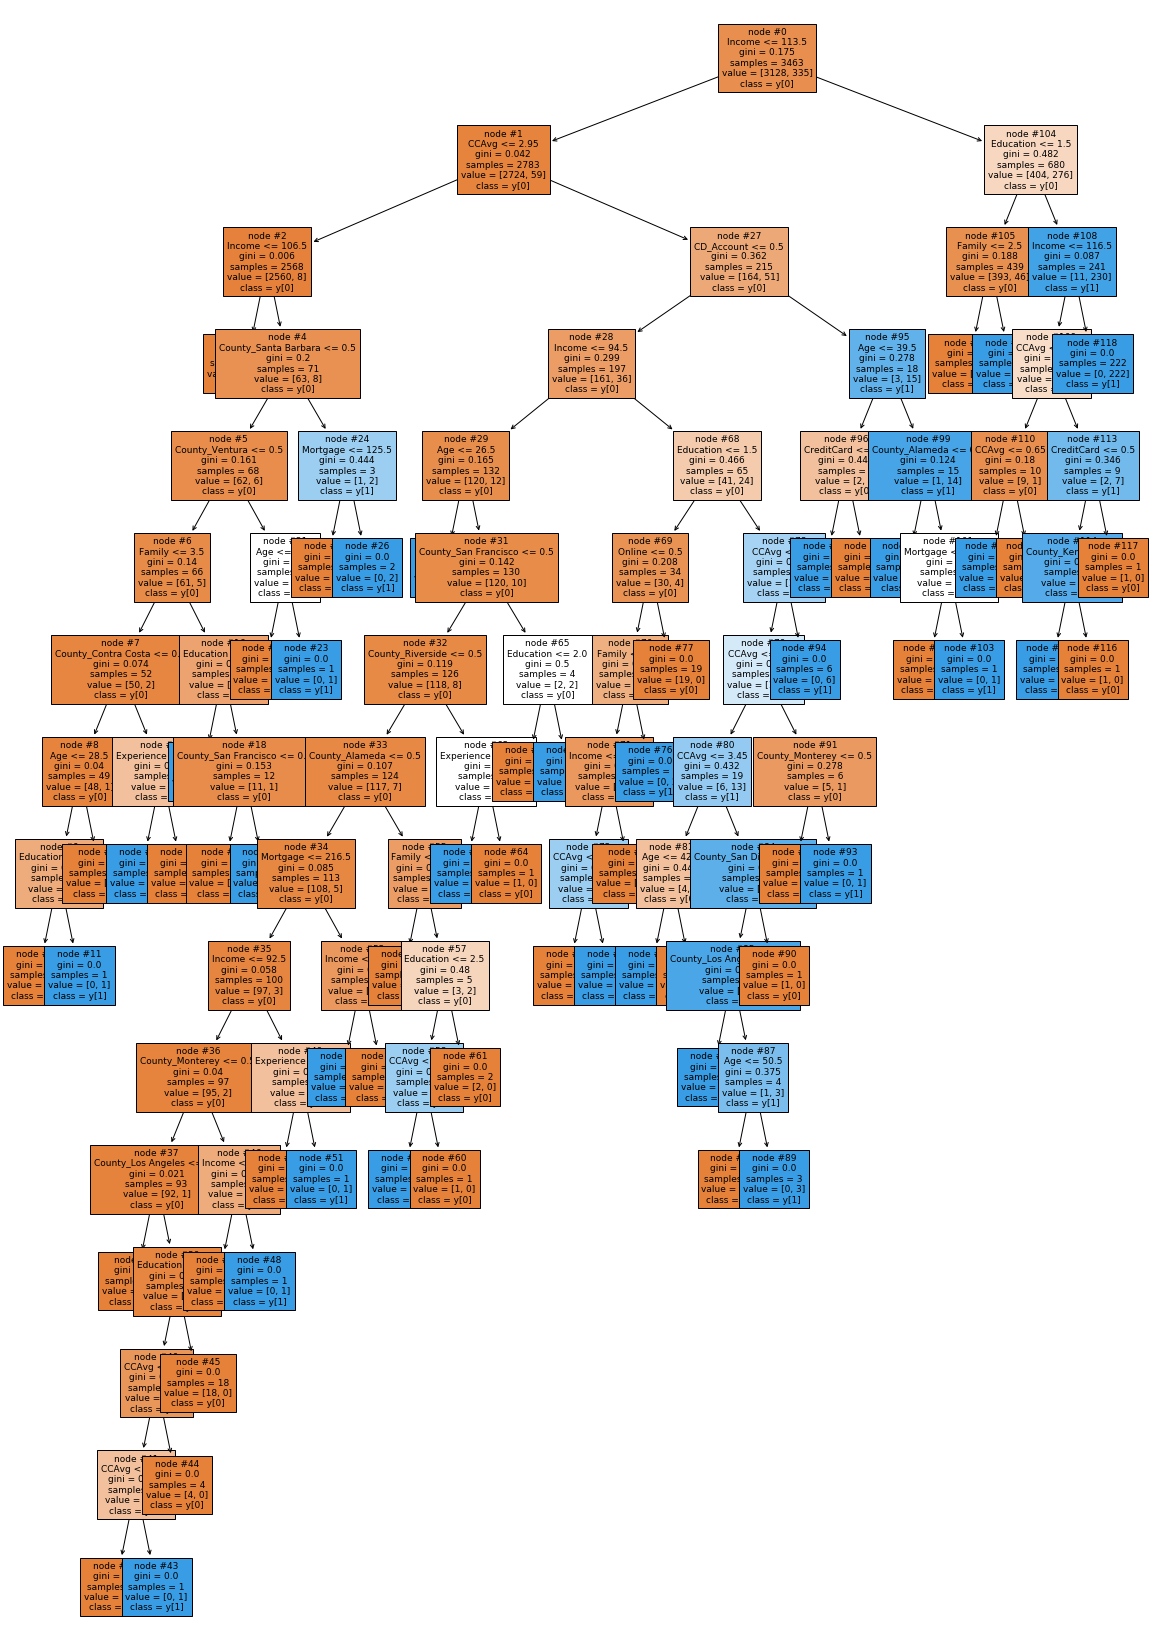

In [80]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [81]:
#Gini Importance

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
Education              0.398679
Income                 0.313082
Family                 0.142760
CCAvg                  0.064033
CD_Account             0.023071
Age                    0.017817
Experience             0.006059
County_San Francisco   0.005471
CreditCard             0.004452
Mortgage               0.004439
County_Monterey        0.003479
County_Santa Barbara   0.003177
County_Kern            0.002892
County_San Diego       0.002563
County_Alameda         0.002059
Online                 0.001970
County_Riverside       0.001280
County_Ventura         0.001155
County_Contra Costa    0.000915
County_Los Angeles     0.000647
County_San Bernardino  0.000000
County_Santa Cruz      0.000000
County_Others          0.000000
County_Yolo            0.000000
County_Sacramento      0.000000
County_San Mateo       0.000000
County_Orange          0.000000
County_Santa Clara     0.000000
Securities_Account     0.000000
County_Marin           0.000000


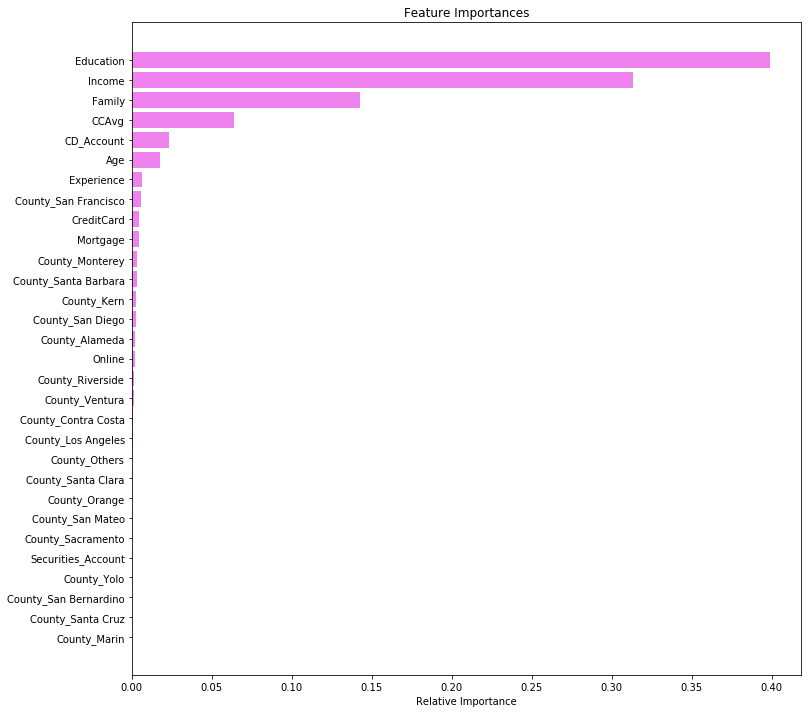

In [82]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [83]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

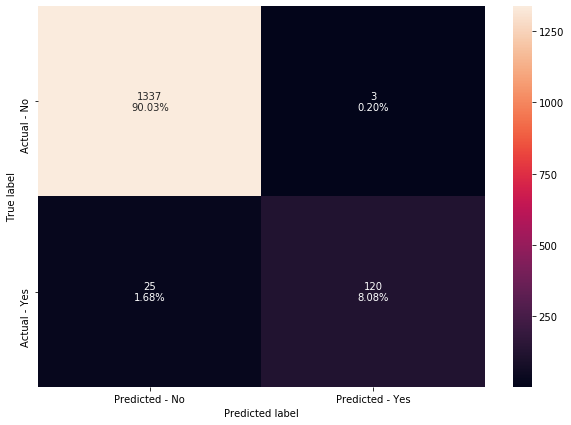

In [84]:
make_confusion_matrix(dTree1, y_test)

In [85]:
# Accuracy on train and test
print("Accuracy on training set : ",dTree1.score(X_train, y_train))
print("Accuracy on test set : ",dTree1.score(X_test, y_test))
# Recall on train and test
get_recall_score(dTree1)

Accuracy on training set :  0.9841178169217442
Accuracy on test set :  0.9811447811447811
Recall on training set :  0.844776119402985
Recall on test set :  0.8275862068965517


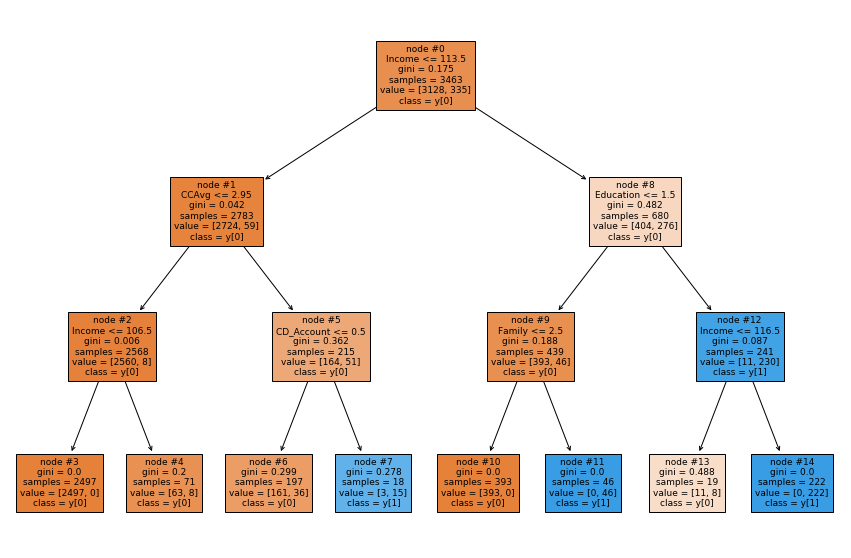

In [86]:
plt.figure(figsize=(15,10))

tree.plot_tree(dTree1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [87]:
#Gini importance

print (pd.DataFrame(dTree1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
Education              0.433683
Income                 0.338340
Family                 0.159032
CCAvg                  0.041985
CD_Account             0.026960
County_San Bernardino  0.000000
County_Santa Barbara   0.000000
County_Yolo            0.000000
County_Monterey        0.000000
County_Ventura         0.000000
Age                    0.000000
County_Contra Costa    0.000000
County_Santa Cruz      0.000000
County_San Mateo       0.000000
County_Riverside       0.000000
County_Kern            0.000000
County_Sacramento      0.000000
County_Others          0.000000
County_San Francisco   0.000000
County_Orange          0.000000
Experience             0.000000
County_Alameda         0.000000
County_Santa Clara     0.000000
County_San Diego       0.000000
County_Los Angeles     0.000000
CreditCard             0.000000
Online                 0.000000
Securities_Account     0.000000
Mortgage               0.000000
County_Marin           0.000000


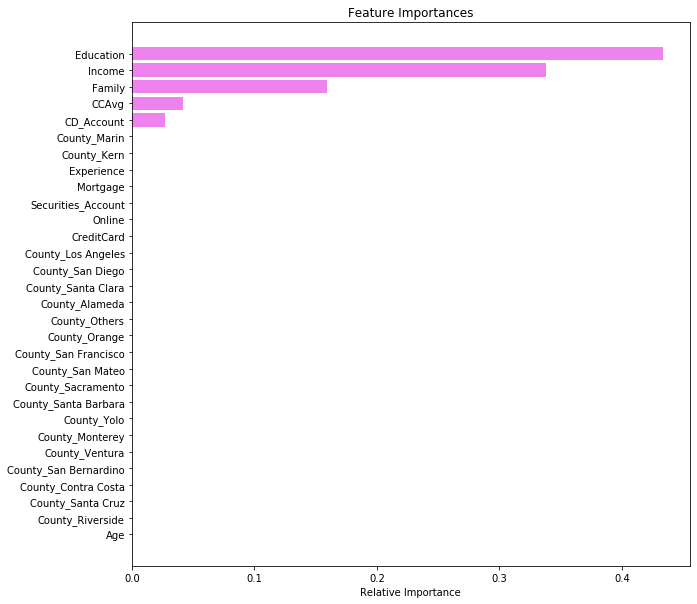

In [88]:
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [89]:
from sklearn.model_selection import GridSearchCV

- Another hyper parameter called estimator used for pre-puning to avoid over fitting

In [90]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, random_state=1)

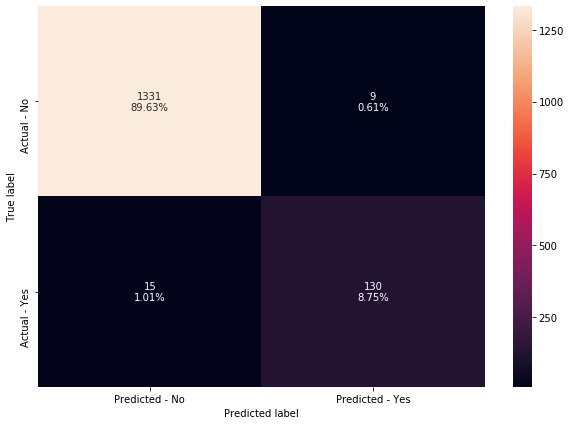

In [91]:
make_confusion_matrix(estimator,y_test)

In [92]:
# Accuracy on train and test
print("Accuracy on training set : ",estimator.score(X_train, y_train))
print("Accuracy on test set : ",estimator.score(X_test, y_test))
# Recall on train and test
get_recall_score(estimator)

Accuracy on training set :  0.9881605544325729
Accuracy on test set :  0.9838383838383838
Recall on training set :  0.9253731343283582
Recall on test set :  0.896551724137931


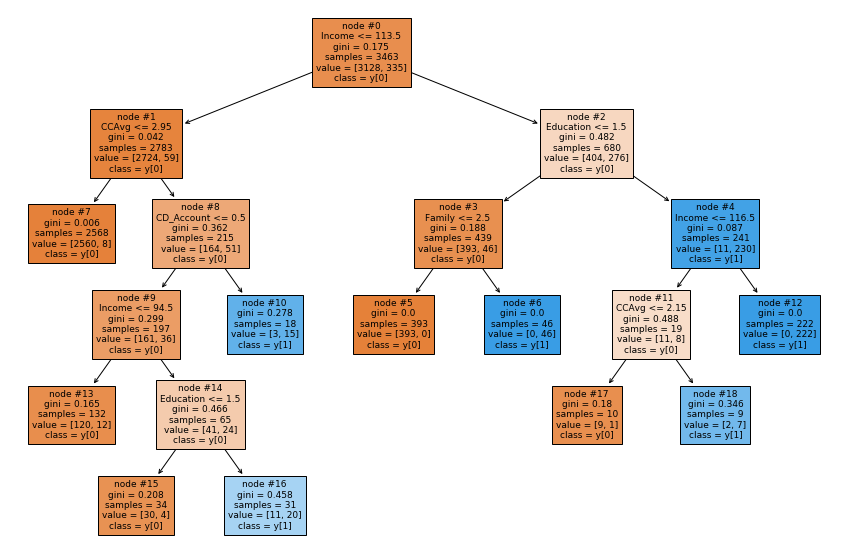

In [93]:
plt.figure(figsize=(15,10))

tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [94]:
#Gini importance

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))


                            Imp
Education              0.435655
Income                 0.336063
Family                 0.153584
CCAvg                  0.048663
CD_Account             0.026036
County_San Bernardino  0.000000
County_Santa Barbara   0.000000
County_Yolo            0.000000
County_Monterey        0.000000
County_Ventura         0.000000
Age                    0.000000
County_Contra Costa    0.000000
County_Santa Cruz      0.000000
County_San Mateo       0.000000
County_Riverside       0.000000
County_Kern            0.000000
County_Sacramento      0.000000
County_Others          0.000000
County_San Francisco   0.000000
County_Orange          0.000000
Experience             0.000000
County_Alameda         0.000000
County_Santa Clara     0.000000
County_San Diego       0.000000
County_Los Angeles     0.000000
CreditCard             0.000000
Online                 0.000000
Securities_Account     0.000000
Mortgage               0.000000
County_Marin           0.000000


Here we will see that importance of features has increased

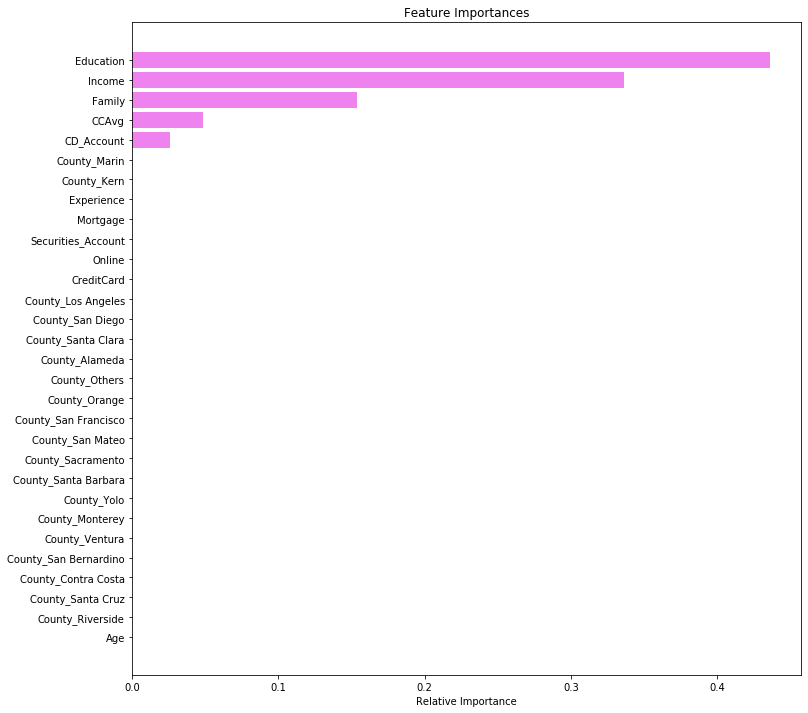

In [95]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- The reduction of the over fitting, using pre-pruning technique makes the recall better
- Hyperparameter tuning using the grid search is better than randomly limiting a hyperparameter
- Post pruning might give us better results

# Cost Complexity Pruning

In [96]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [97]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000143,0.000571
2,0.000265,0.001101
3,0.000270,0.001640
4,0.000277,0.002749
5,0.000278,0.003860
6,0.000289,0.004148
7,0.000289,0.004437
8,0.000315,0.005382
9,0.000353,0.006795


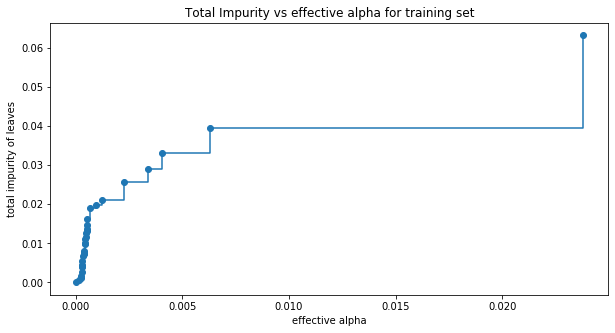

In [98]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

- As alpha grows, the impurity grows and the tree gets simpler

In [99]:
#Testing series of Plot as Alpha Changes

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.05577997576470471


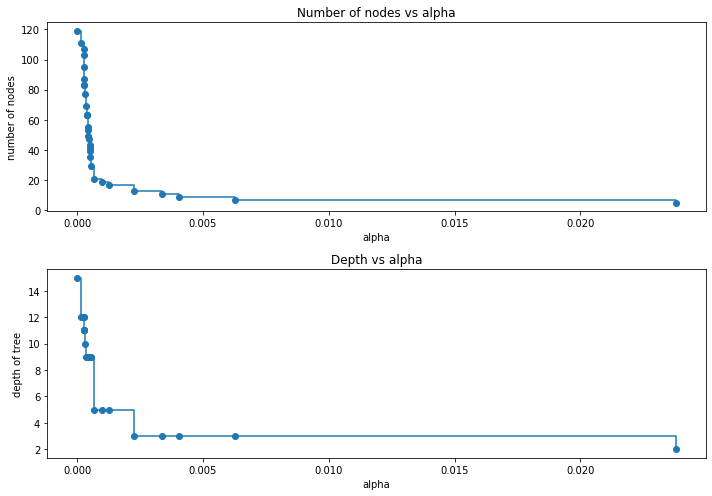

In [100]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

- The depth of the tree decreases as alpha increases.
- This results to lesser complexity and avoiding overfitting

In [101]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

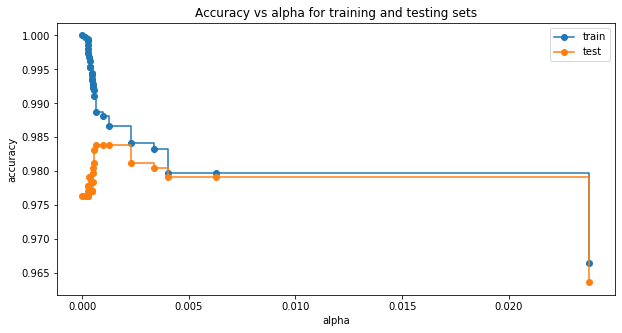

In [102]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [103]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('Test accuracy of best model: ',best_model.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.0006599961258890214, random_state=1)
Training accuracy of best model:  0.9887380883626913
Test accuracy of best model:  0.9838383838383838


In [104]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [105]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

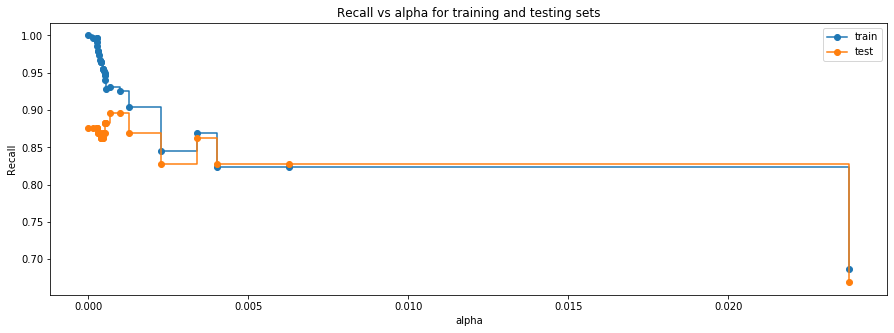

In [106]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [107]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006599961258890214, random_state=1)


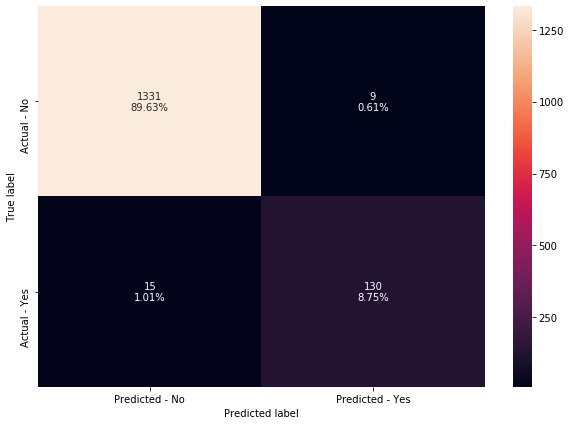

In [108]:
make_confusion_matrix(best_model,y_test)

In [109]:
# Recall on train and test
get_recall_score(best_model)

Recall on training set :  0.9313432835820895
Recall on test set :  0.896551724137931


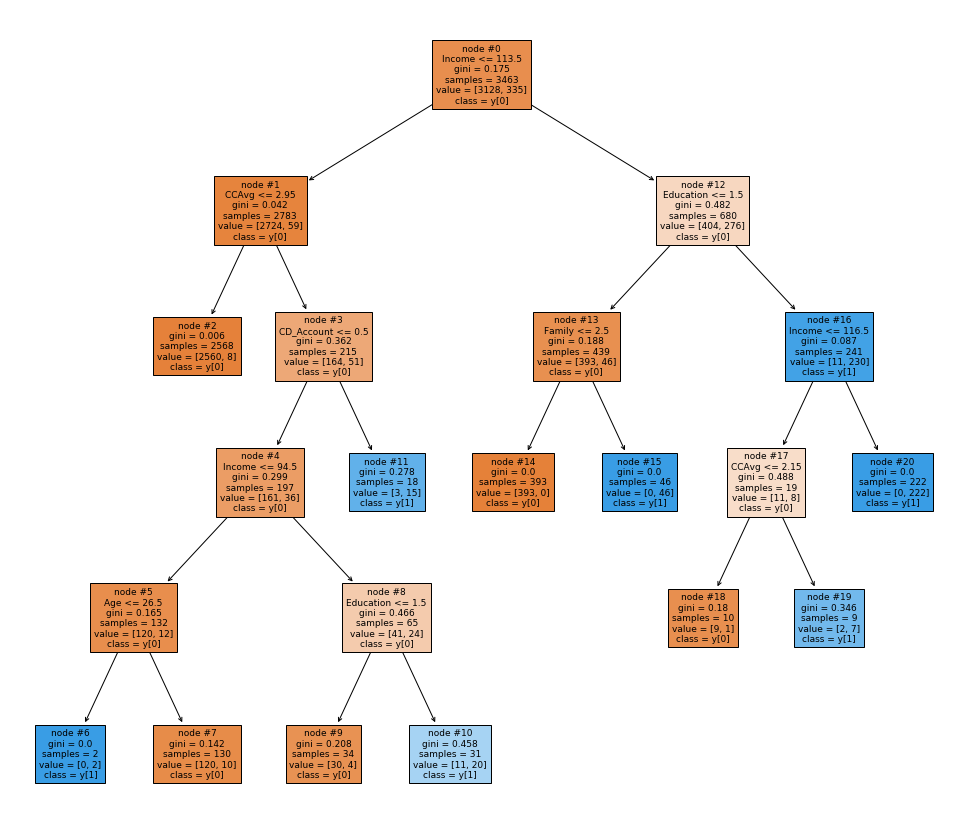

In [110]:
plt.figure(figsize=(17,15))

tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [111]:
#Gini importance

print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
Education              0.432945
Income                 0.333972
Family                 0.152628
CCAvg                  0.048360
CD_Account             0.025874
Age                    0.006220
County_Kern            0.000000
County_Riverside       0.000000
County_San Mateo       0.000000
County_Santa Cruz      0.000000
County_Contra Costa    0.000000
County_San Bernardino  0.000000
County_Ventura         0.000000
County_Monterey        0.000000
County_Yolo            0.000000
County_Santa Barbara   0.000000
County_Sacramento      0.000000
County_Others          0.000000
County_San Francisco   0.000000
County_Orange          0.000000
Experience             0.000000
County_Alameda         0.000000
County_Santa Clara     0.000000
County_San Diego       0.000000
County_Los Angeles     0.000000
CreditCard             0.000000
Online                 0.000000
Securities_Account     0.000000
Mortgage               0.000000
County_Marin           0.000000


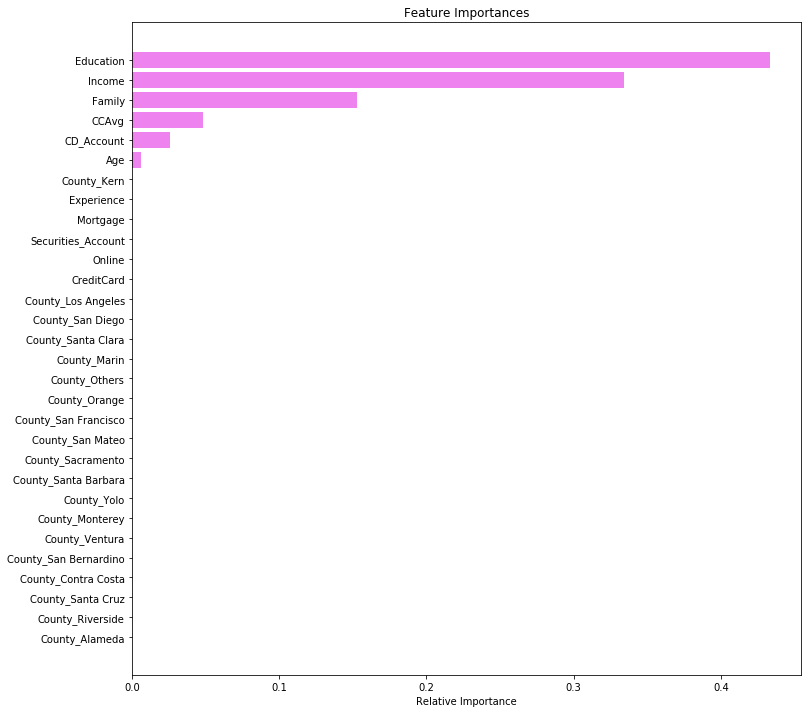

In [112]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [113]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision tree with restricted maximum depth','Decision treee with hyperparameter tuning',
                                         'Decision tree with post-pruning'], 'Train_Recall':[1,0.81,0.92,0.93], 'Test_Recall':[0.87,0.82,0.86,0.89]}) 
comparison_frame

,Model,Train_Recall,Test_Recall
0,Initial decision tree model,1.00,0.87
1,Decision tree with restricted maximum depth,0.81,0.82
2,Decision treee with hyperparameter tuning,0.92,0.86
3,Decision tree with post-pruning,0.93,0.89


Decision tree with post-pruning is giving the highest recall on test set.

# Insights & Conclusion

- Most of the customers who accepted the loan in the last campaign do not use a credit card issued by other Banks
- Most of the customers who accepted the loan in the last campaign do not have securities account with the bank
- Most of the customers who accepted the loan in the last campaign do not have a certificate of deposit account with the bank

- The logistic regression shows that the acceptance of the personal loan is highly correlated to Education Level, the years of Professional Experience, the Family size, the avergae spending on the credit card, the cretificate deposit account and the annual income of the customers

- The decision tree is a better model than the logistic regression because it gives a higher recall value

# Recommendation

The bank should conduct personal loan marketing campaigns focused at customers with relatively higher level of Education (preferably Advanced/ professionals), customers with relative higher income and customers who have large Family sizes